In [21]:
import pandas as pd
import seaborn as sns
import numpy as np
import statsmodels.formula.api as smf
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [22]:
df = pd.read_csv("D:\Assignment\Salary_Data.csv")

In [23]:
df

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [51]:
df = df.rename({'YearsExperience':'years','Salary':'salary'}, axis= 1)

In [52]:
df

,years,salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


<AxesSubplot:xlabel='salary', ylabel='Density'>

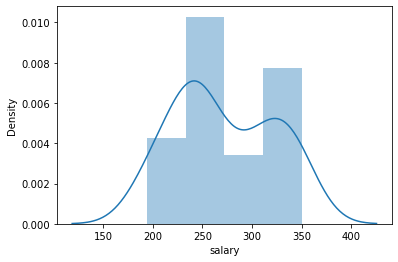

In [54]:
sns.distplot(np.sqrt(df['salary']))

<AxesSubplot:xlabel='years', ylabel='salary'>

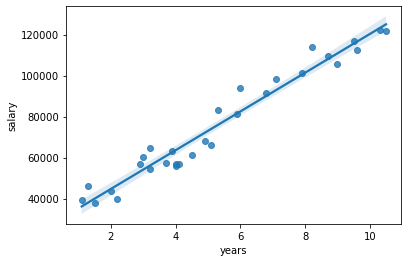

In [60]:
sns.regplot(x = df['years'], y = df['salary'])

In [61]:
df.corr()

,years,salary
years,1.000000,0.978242
salary,0.978242,1.000000


In [78]:
modle = smf.ols('salary~years', data= df).fit()

In [84]:
modle.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           1.14e-20
Time:                        22:25:18   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
years       9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
modle1 = smf.ols('np.log(salary)~np.log(years)', data= df).fit()

In [83]:
modle1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         np.log(salary)   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     267.4
Date:                Mon, 17 Apr 2023   Prob (F-statistic):           7.40e-16
Time:                        22:24:51   Log-Likelihood:                 23.209
No. Observations:                  30   AIC:                            -42.42
Df Residuals:                      28   BIC:                            -39.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        10.3280      0.056    184.868      0.000      10.214      10.442
np.log(years)     0.5621      0.034     16.353      0.000       0.492       0.632
==============================================================================
Omnibus:                        0.102   Durbin-Watson:                   0.988
Prob(Omnibus):                  0.950   Jarque-Bera (JB):                0.297
Skew:                           0.093   Prob(JB):                        0.862
Kurtosis:                       2.549   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [91]:
predicted = pd.DataFrame()
predicted['years'] = df.years
predicted['salary']= df.salary
predicted['Results']= pd.DataFrame(modle.predict(predicted.years))

In [92]:
predicted

,years,salary,Results
0,1.1,39343.0,36187.158752
1,1.3,46205.0,38077.151217
2,1.5,37731.0,39967.143681
3,2.0,43525.0,44692.124842
4,2.2,39891.0,46582.117306
5,2.9,56642.0,53197.090931
6,3.0,60150.0,54142.087163
7,3.2,54445.0,56032.079627
8,3.2,64445.0,56032.079627
9,3.7,57189.0,60757.060788


In [96]:
new_years = pd.Series([4,5.5,9.6])

In [97]:
new_years

0    4.0
1    5.5
2    9.6
dtype: float64

In [105]:
df_new = pd.DataFrame(columns= ["Years"], data=new_years)

In [106]:
df_new

,Years
0,4.0
1,5.5
2,9.6


In [109]:
new_pred = pd.DataFrame()
new_pred['years'] = df_new.Years
new_pred['Predticted_salary'] = pd.DataFrame(modle.predict(new_pred.years))

In [110]:
new_pred

,years,Predticted_salary
0,4.0,63592.049484
1,5.5,77766.992967
2,9.6,116511.838485
